# ANALYSIS OF AN IMAGE SEQUENCE AFTER DATA GENERATION USING THE CALCIUM CHARACTERIZATION PIPELINE

### Initialization

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram, 
    plot_pie_chart,
    visualize_image,
    plot_bar,
    plot_histogram_by_group,
    plot_scatter_size_coded
    )
from calcium_activity_characterization.io.csv_loader import load_and_merge_datasets
from calcium_activity_characterization.analysis.statistics import analyze_peak_intervals

sns.set(style="whitegrid")

In [2]:
# Define paths to control datasets
control_paths = {
    "20250326 - IS1": "D:/Mateo/20250326/Output/IS1"
}

In [3]:
# Load and merge datasets
peaks = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/peaks.csv")
cells = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/cells.csv")
events = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/events.csv")
communications = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/communications.csv")
cellmotion = load_and_merge_datasets(control_paths=control_paths, file_name="cell-motion/metrics_cellmotion.csv")

## POPULATION

### Binary & Heatmap Raster Plot

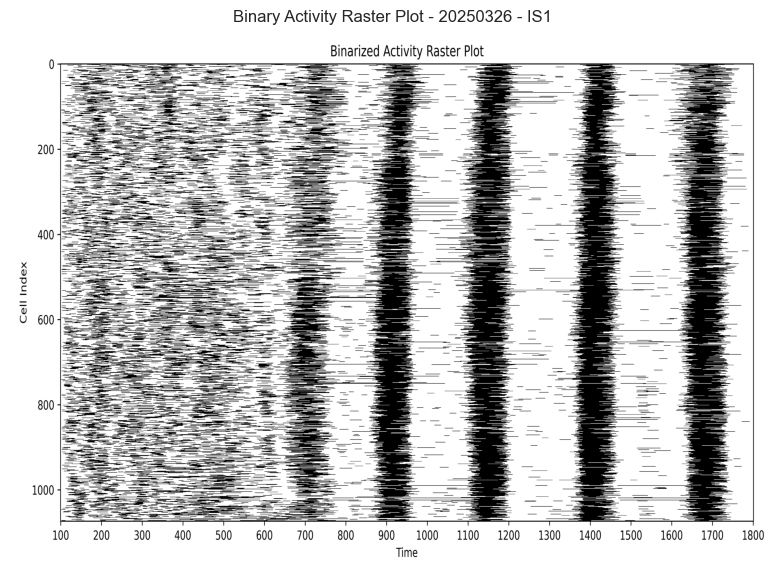

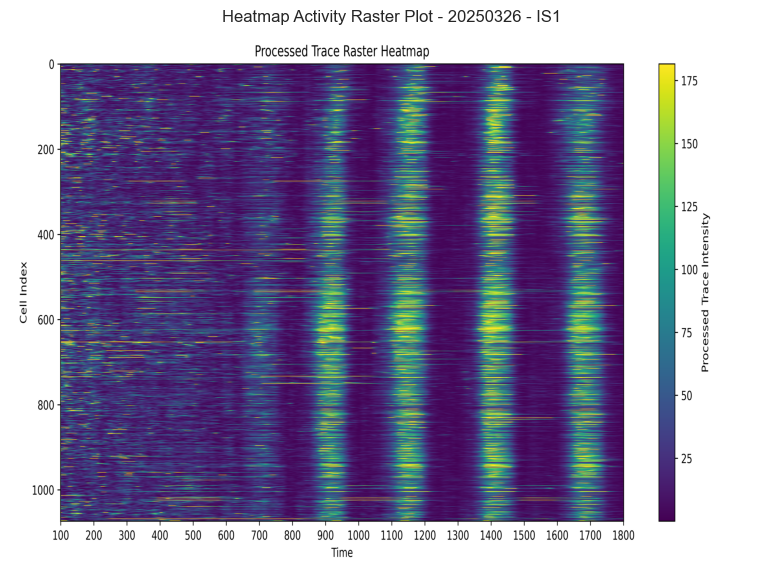

In [4]:
visualize_image(
    image_source=control_paths,
    image_name="signal-processing/raster_plot.png",
    title="Binary Activity Raster Plot",
    figsize=(8, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="signal-processing/heatmap_raster.png",
    title="Heatmap Activity Raster Plot",
    figsize=(8, 6)
)

### Peaks population

In [5]:
print(f"Total number of peaks: {len(peaks)}")
print(f"Total number of cells: {len(cells)}")

Total number of peaks: 11955
Total number of cells: 1074


### Peaks statistics

[2025-08-12 21:10:08] [INFO] calcium: plot_histogram: removed 23 outliers out of 11955 on 'Duration (s)' (lower=-132, upper=225)


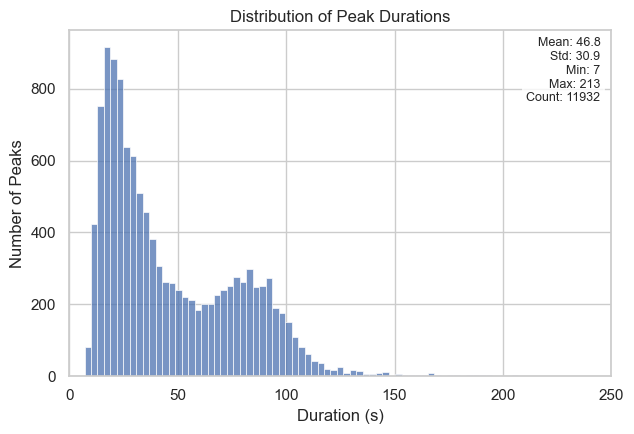

[2025-08-12 21:10:08] [INFO] calcium: plot_histogram: removed 52 outliers out of 11955 on 'Prominence (noise std units)' (lower=-210.35, upper=345.8)


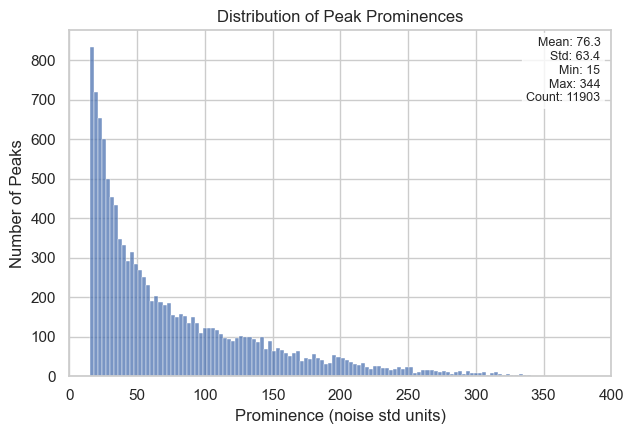

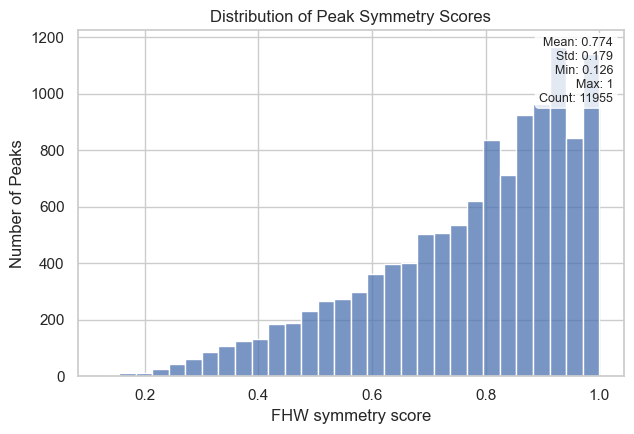

In [6]:
plot_histogram(
    df=peaks,
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks,
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks,
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Distribution of peaks per event types

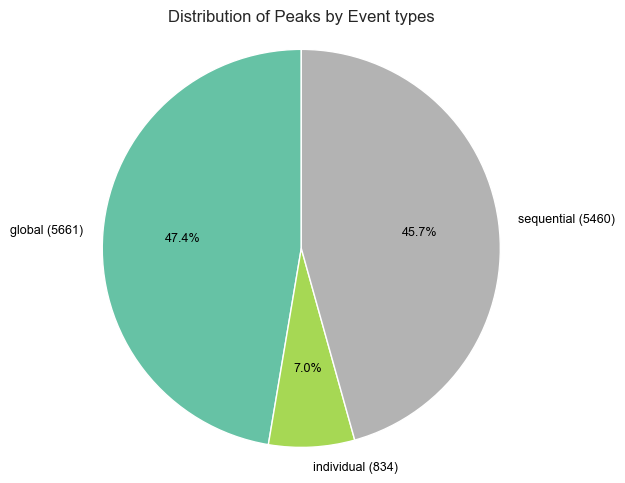

In [7]:
plot_pie_chart(
    df=peaks,
    column="In event",
    title="Distribution of Peaks by Event types",
    palette="Set2"
)

### Peaks statistics per event types

[2025-08-12 21:10:09] [INFO] calcium: plot_histogram_by_group: removed 23 outliers out of 11955 on 'Duration (s)' (lower=-132, upper=225)


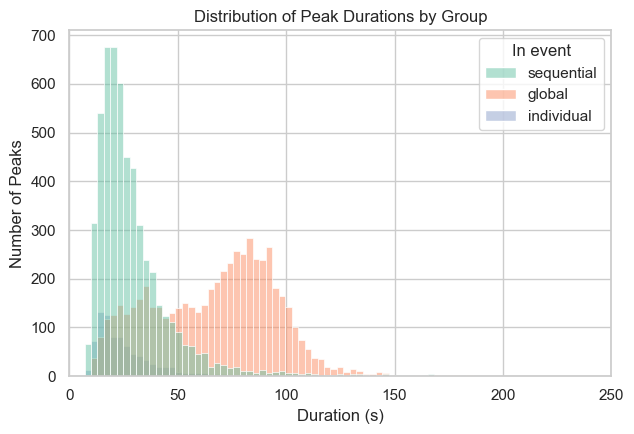

[2025-08-12 21:10:09] [INFO] calcium: plot_histogram_by_group: removed 52 outliers out of 11955 on 'Prominence (noise std units)' (lower=-210.35, upper=345.8)


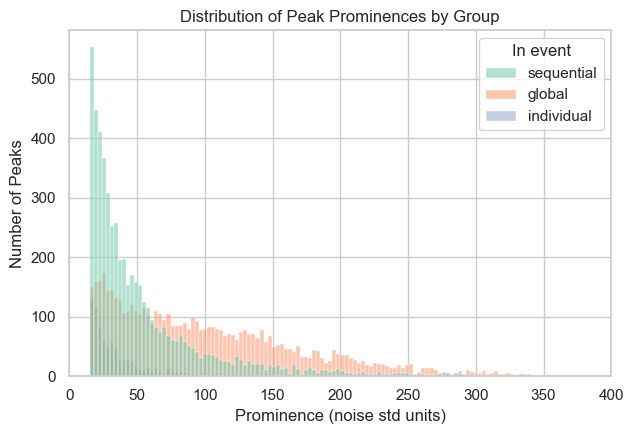

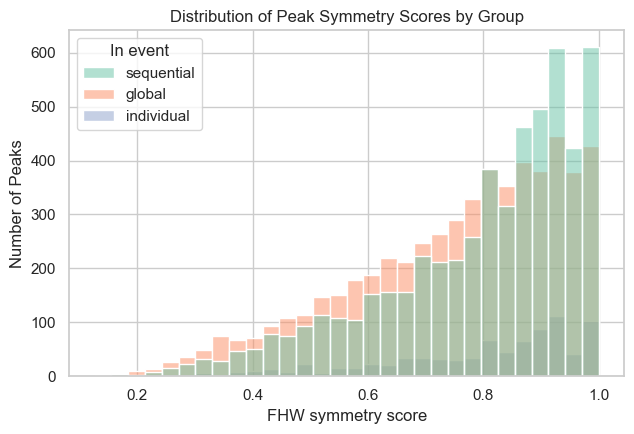

In [8]:
peaks["In event"] = peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=peaks,
    value_column="Duration (s)",
    group_column="In event",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks,
    value_column="FHW symmetry score",
    group_column="In event",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)

## GLOBAL EVENTS

### Peak statistics in global events

[2025-08-12 21:10:10] [INFO] calcium: plot_histogram: removed 17 outliers out of 5661 on 'Duration (s)' (lower=-92, upper=223)


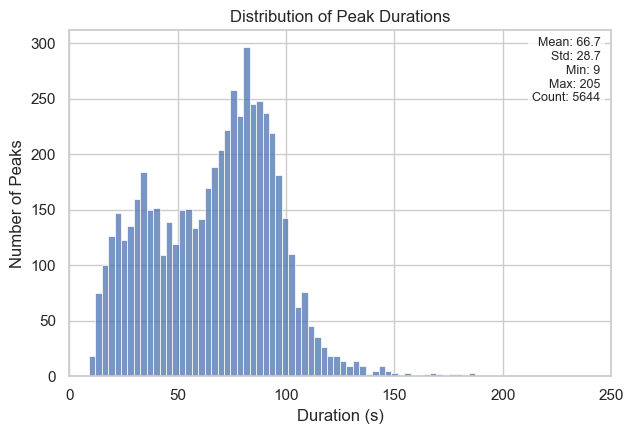

[2025-08-12 21:10:10] [INFO] calcium: plot_histogram: removed 9 outliers out of 5661 on 'Prominence (noise std units)' (lower=-248, upper=435.9)


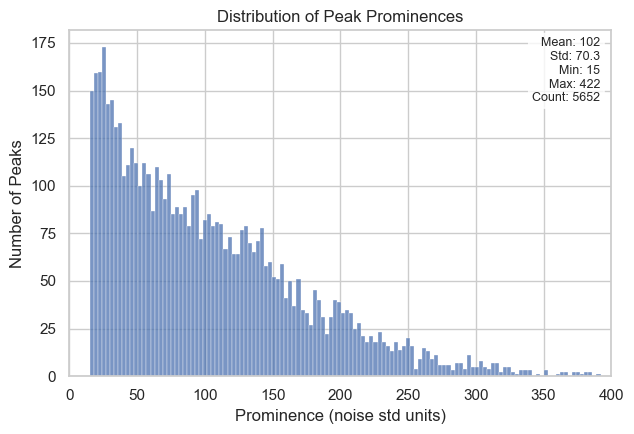

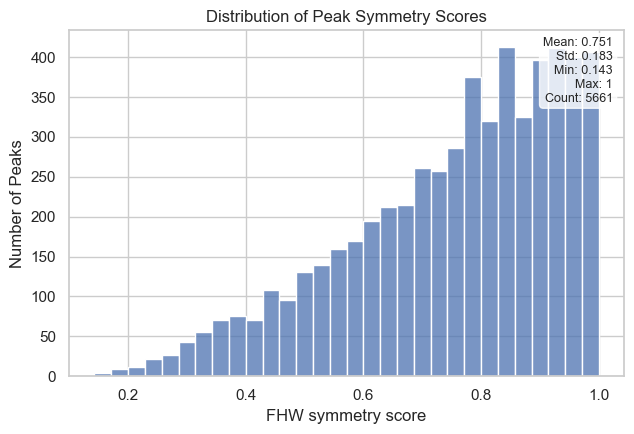

In [9]:
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Peak statistics in global event per event ID

[2025-08-12 21:10:10] [INFO] calcium: plot_histogram_by_group: removed 17 outliers out of 5661 on 'Duration (s)' (lower=-92, upper=223)


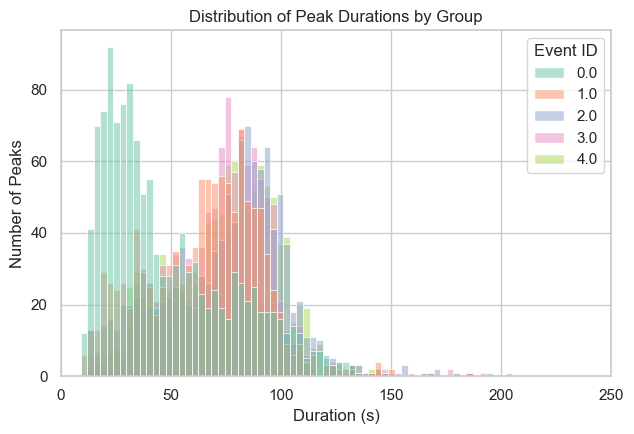

[2025-08-12 21:10:11] [INFO] calcium: plot_histogram_by_group: removed 9 outliers out of 5661 on 'Prominence (noise std units)' (lower=-248, upper=435.9)


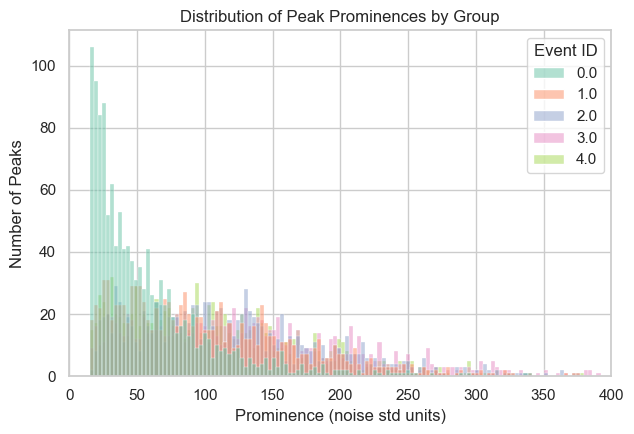

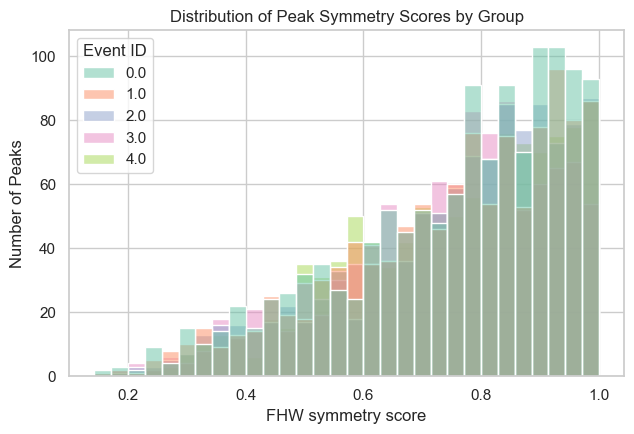

In [10]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="Duration (s)",
    group_column="Event ID",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="Prominence (noise std units)",
    group_column="Event ID",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="FHW symmetry score",
    group_column="Event ID",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)

### Kinetics of global events

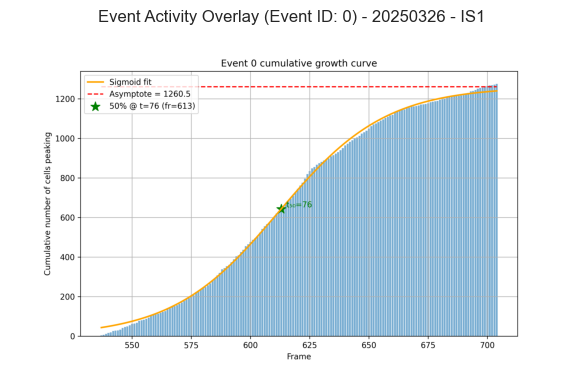

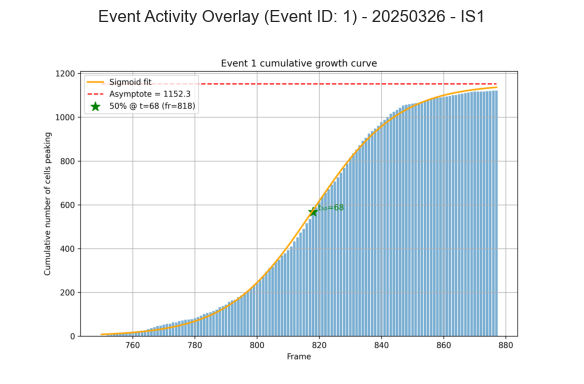

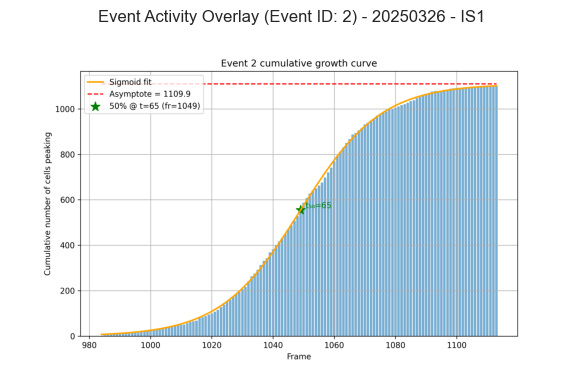

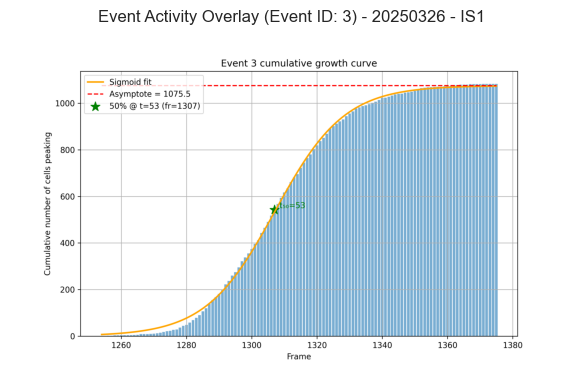

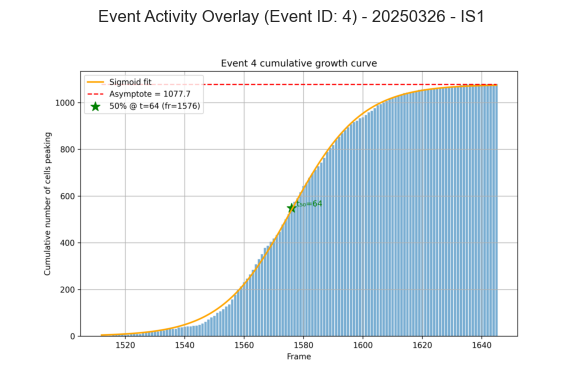

In [11]:
global_events = events[events["Event type"] == "GlobalEvent"].copy()

for event_id in global_events["Event ID"]:
    visualize_image(
        image_source=control_paths,
        image_name=f"events/event-growth-curve-{event_id}.png",
        title=f"Event Activity Overlay (Event ID: {event_id})",
        figsize=(6, 4)
    )

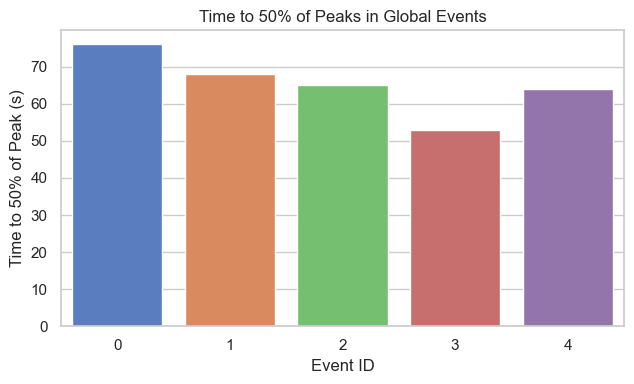

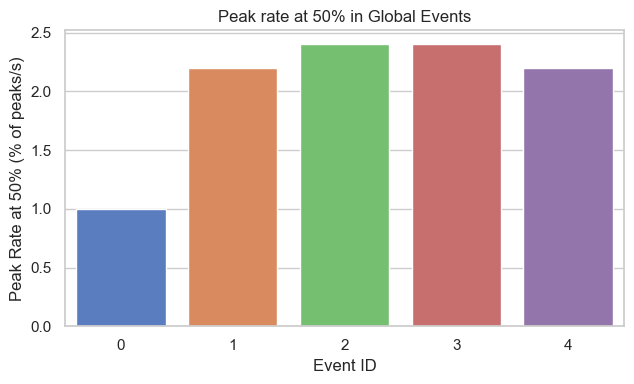

In [12]:
plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="Time to 50% (s)",
    title="Time to 50% of Peaks in Global Events",
    ylabel="Time to 50% of Peak (s)",
    xlabel="Event ID",
    rotation=0,
    palette="muted",
    hue_column=None
)
plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="Normalized peak rate at 50% (% of peaks/s)",
    title="Peak rate at 50% in Global Events",
    ylabel="Peak Rate at 50% (% of peaks/s)",
    xlabel="Event ID",
    rotation=0,
    palette="muted",
    hue_column=None
)

### Cells occurences in global events

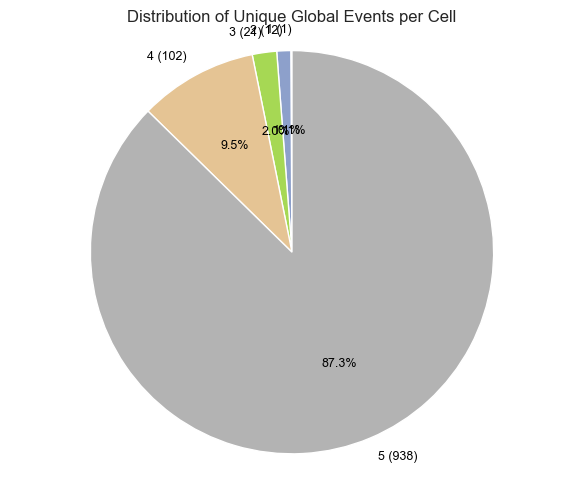

In [13]:
plot_pie_chart(
    df=cells,
    column="Occurences in global events",
    title="Distribution of Unique Global Events per Cell",
    palette="Set2"
)

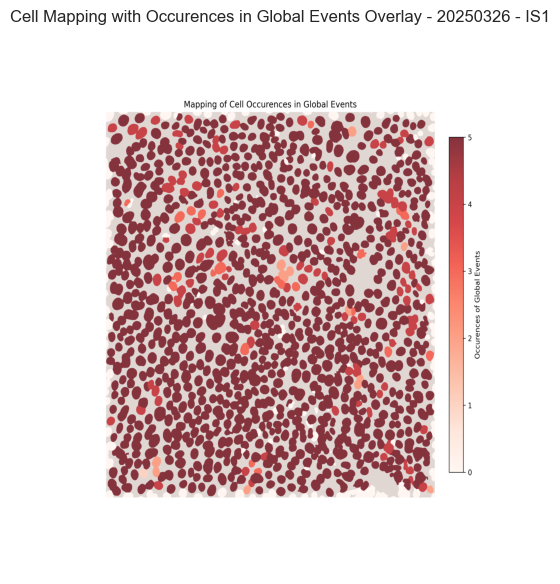

In [14]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurences_in_global_events_overlay.png",
    title="Cell Mapping with Occurences in Global Events Overlay",
    figsize=(5, 6)
)

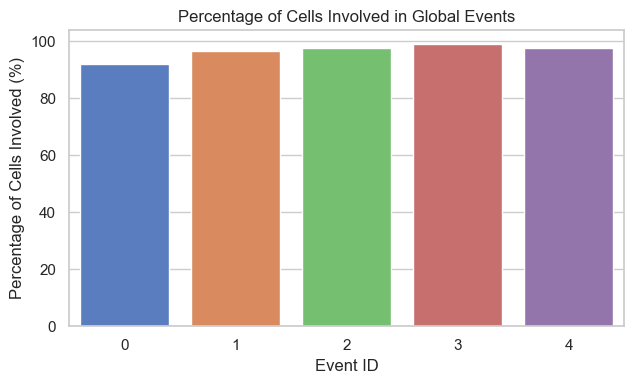

In [15]:
global_events["% of cells involved"] = 100 * global_events["Number of cells involved"] / len(cells)

plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="% of cells involved",
    title="Percentage of Cells Involved in Global Events",
    ylabel="Percentage of Cells Involved (%)",
    xlabel="Event ID",
    rotation=0
)

### Inter-event interval analysis

In [16]:
intervals, periodicity, frequency = analyze_peak_intervals(events[events["Event type"] == "GlobalEvent"]["Event peak time (s)"].tolist())

print(f"Intervals between global event peaks: {intervals}")

if periodicity is not None:
    print(f"Estimated periodicity: {periodicity:.3f}")

if periodicity is not None and periodicity > 0.8:
    print("The global events exhibit a regular periodic pattern.")
    print(f"Estimated frequency (1/mean interval): {frequency:.3f} Hz")

Intervals between global event peaks: [210.0, 227.0, 260.0, 267.0]
Estimated periodicity: 0.911
The global events exhibit a regular periodic pattern.
Estimated frequency (1/mean interval): 0.004 Hz


### Early peakers in the events

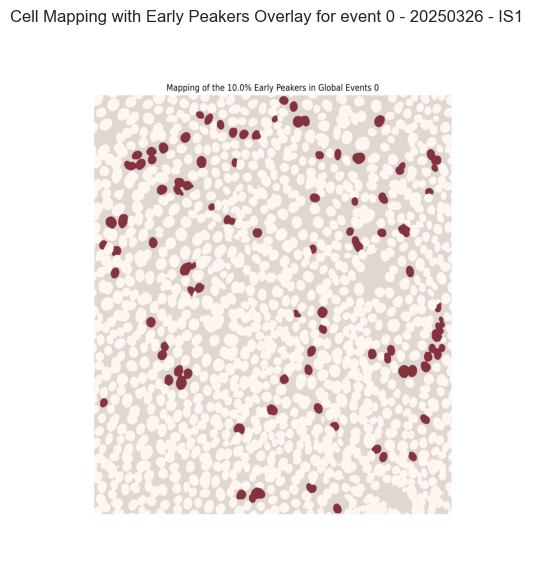

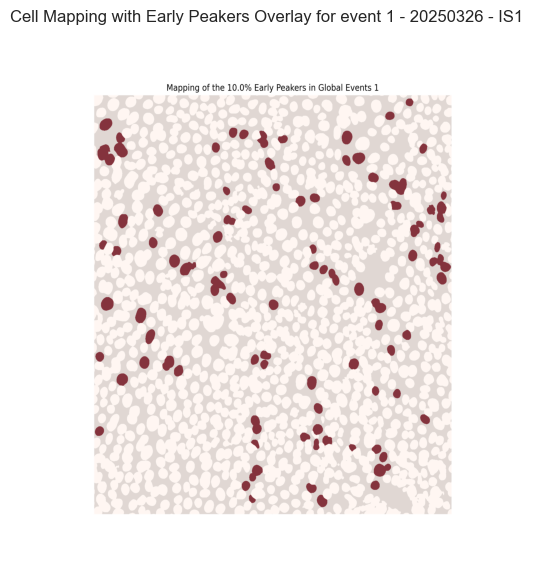

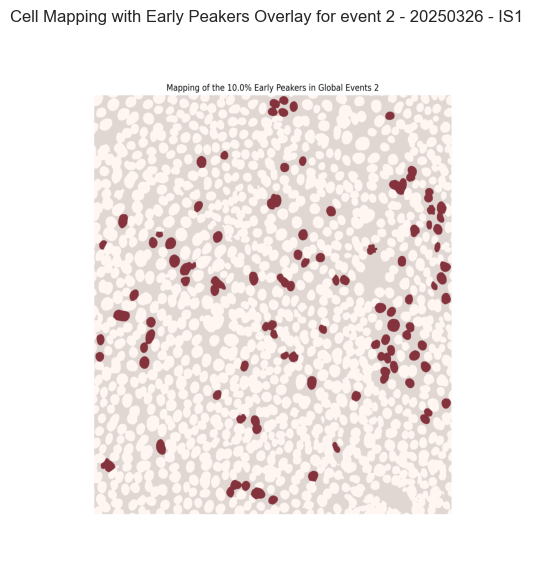

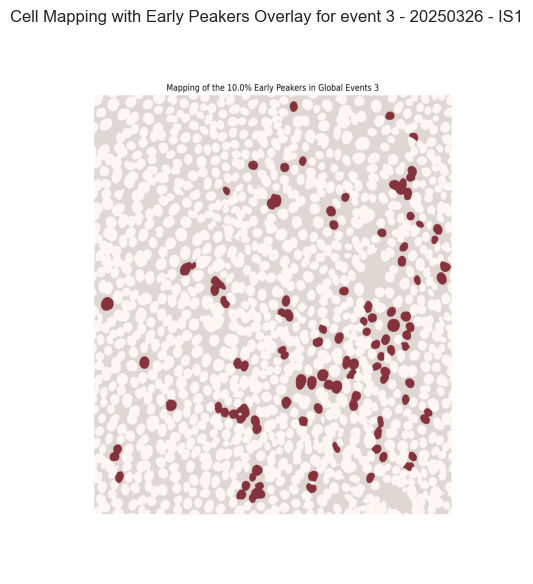

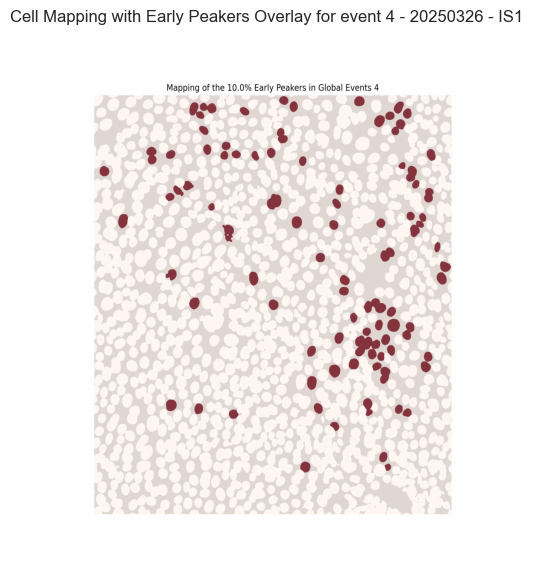

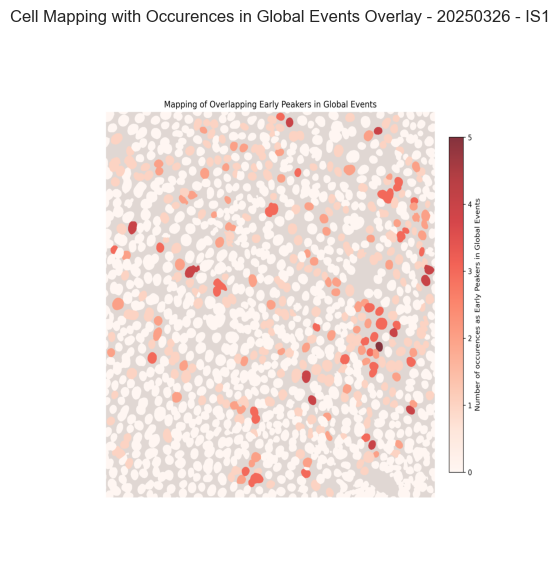

In [17]:
for event_id in global_events["Event ID"]:
    visualize_image(
        image_source=control_paths,
        image_name=f"cell-mapping/global_events/global_event_{event_id}_early_peakers_overlay.png",
        title=f"Cell Mapping with Early Peakers Overlay for event {event_id}",
        figsize=(5, 6)
    )

visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/global_events/global_event_overlap_early_peakers_overlay.png",
    title="Cell Mapping with Occurences in Global Events Overlay",
    figsize=(5, 6)
)

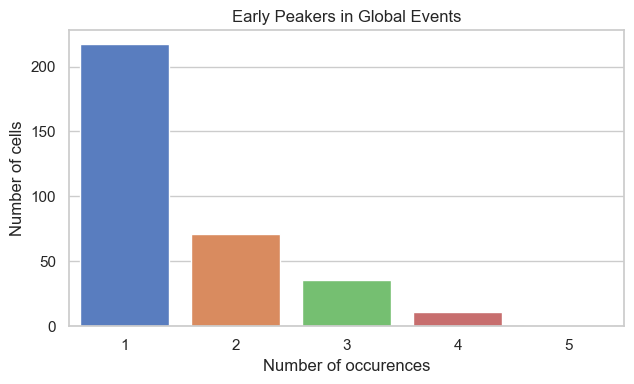

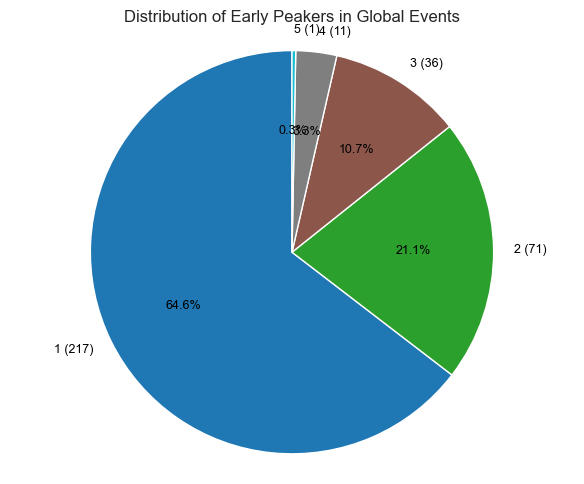

In [18]:
early_peakers_df = (
    cells[cells["Occurences in global events as early peaker"] > 0]
      .groupby("Occurences in global events as early peaker")
      .size()
      .reset_index(name="Number of cells")
      .rename(columns={"Occurences in global events as early peaker": "Number of occurences"})
      .sort_values("Number of occurences")
)

plot_bar(
    df=early_peakers_df,
    axis_column="Number of occurences",
    value_column="Number of cells",
    title="Early Peakers in Global Events",
    xlabel="Number of occurences",
    ylabel="Number of cells",
    rotation=0
)

plot_pie_chart(
    df=cells[cells["Occurences in global events as early peaker"] > 0],
    column="Occurences in global events as early peaker",
    title="Distribution of Early Peakers in Global Events"
)

## SEQUENTIAL EVENTS

### Cells occurences in sequencial events

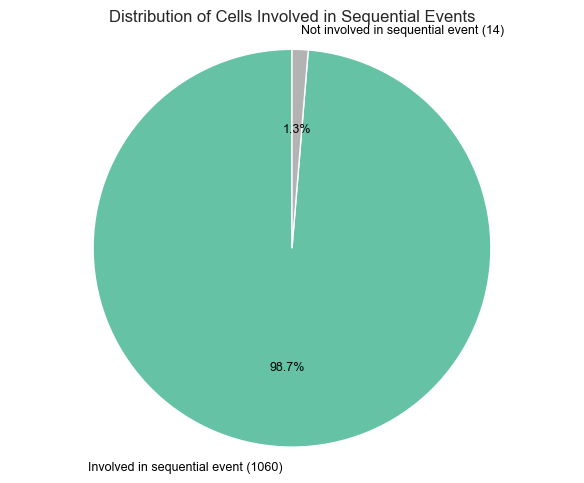

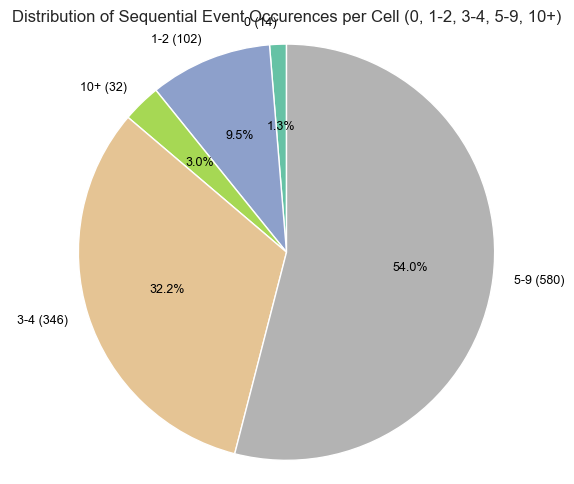

In [19]:
cells["Involved in sequential event"] = cells["Occurences in sequential events"].apply(lambda x: "Involved in sequential event" if x > 0 else "Not involved in sequential event")

plot_pie_chart(
    df=cells,
    column="Involved in sequential event",
    title="Distribution of Cells Involved in Sequential Events",
    palette="Set2"
)

def cells_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1 or n == 2:
        return "1-2"
    elif n == 3 or n == 4:
        return "3-4"
    elif n < 10:
        return "5-9"
    else:
        return "10+"

cells["Occurences in sequential events category"] = cells["Occurences in sequential events"].apply(cells_category)

plot_pie_chart(
    df=cells,
    column="Occurences in sequential events category",
    title="Distribution of Sequential Event Occurences per Cell (0, 1-2, 3-4, 5-9, 10+)",
    palette="Set2"
)

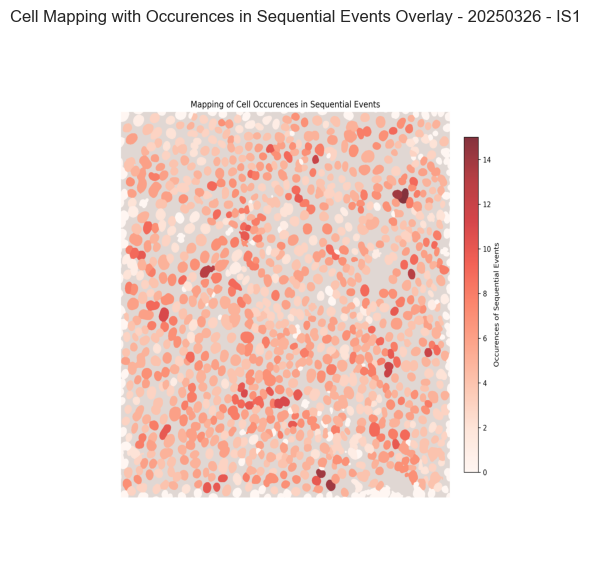

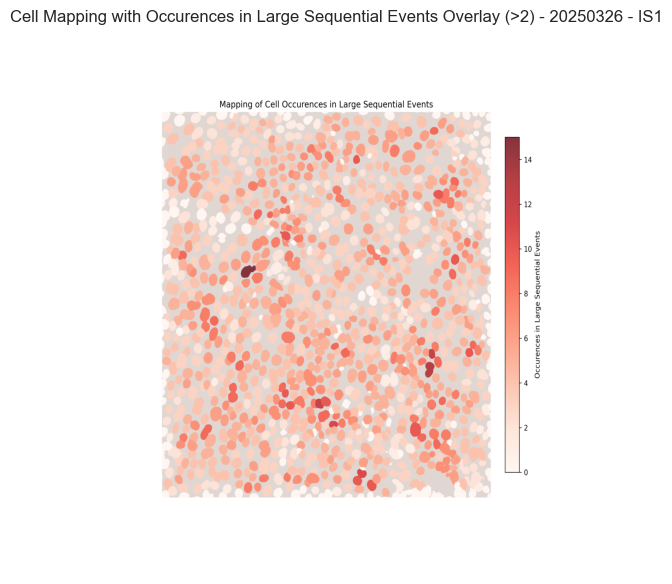

In [20]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurences_in_sequential_events_overlay.png",
    title="Cell Mapping with Occurences in Sequential Events Overlay",
    figsize=(5, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurences_in_large_sequential_events_overlay.png",
    title="Cell Mapping with Occurences in Large Sequential Events Overlay (>2)",
    figsize=(5, 6)
)

### Peaks statistics in sequential events

[2025-08-12 21:10:22] [INFO] calcium: plot_histogram: removed 111 outliers out of 5460 on 'Duration (s)' (lower=-6, upper=90)


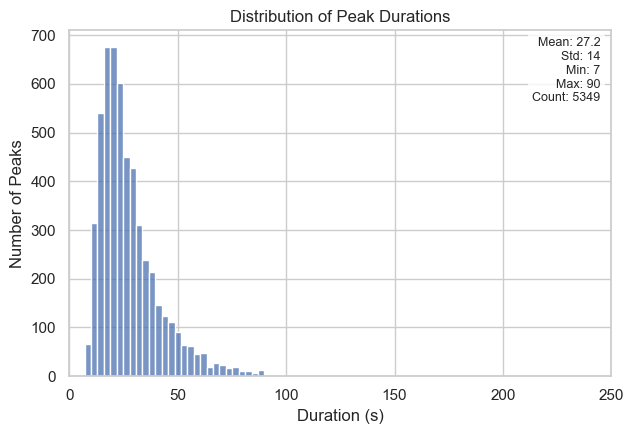

[2025-08-12 21:10:23] [INFO] calcium: plot_histogram: removed 124 outliers out of 5460 on 'Prominence (noise std units)' (lower=-43, upper=223.4)


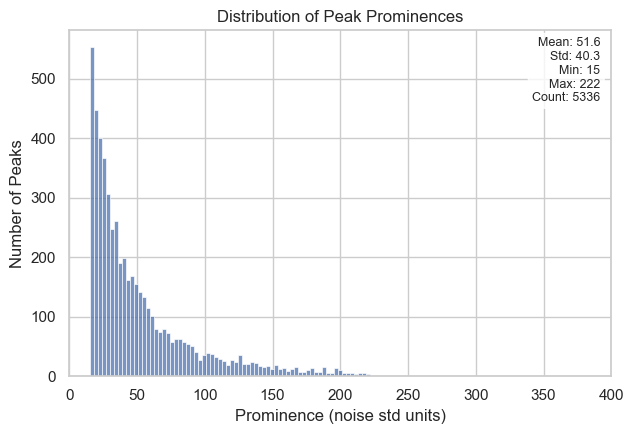

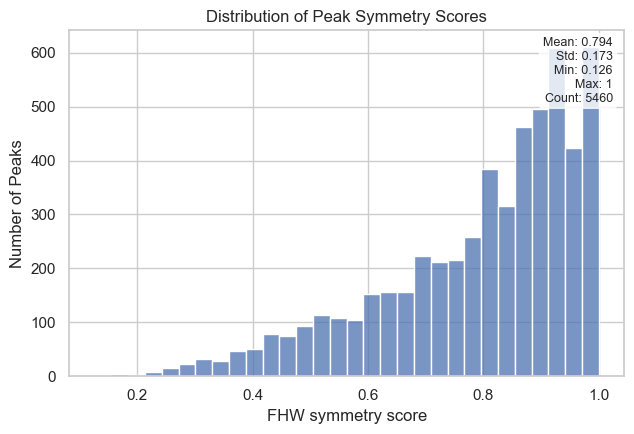

In [21]:
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Cell-cell communication speed

[2025-08-12 21:10:23] [INFO] calcium: plot_histogram: removed 9 outliers out of 1167 on 'Average communication speed (um/s)' (lower=-10.06, upper=18.36)


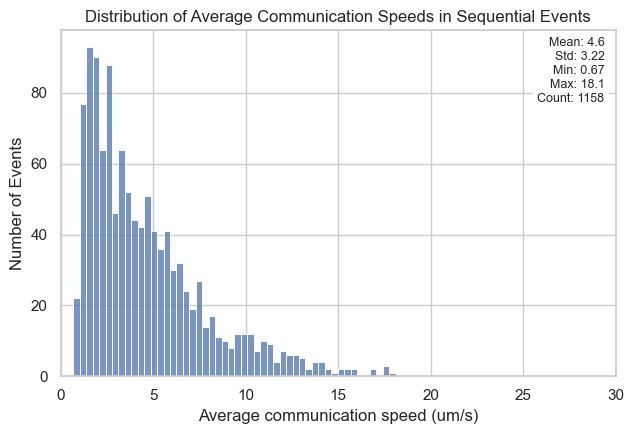

[2025-08-12 21:10:23] [INFO] calcium: plot_histogram: removed 89 outliers out of 4293 on 'Speed (um/s)' (lower=-11.52, upper=18.72)


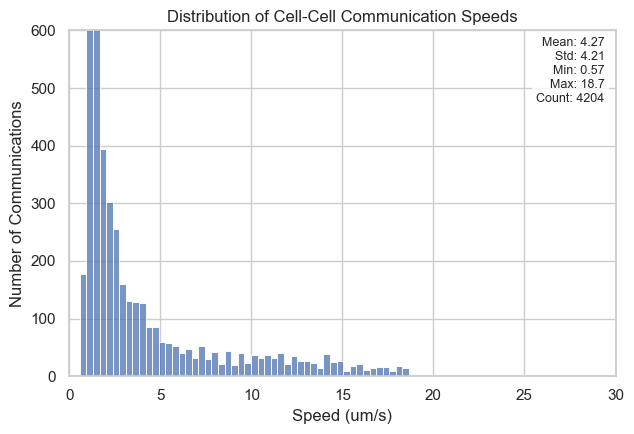

In [22]:
sequential_events = events[events["Event type"] == "SequentialEvent"].copy()
plot_histogram(
    df=sequential_events,
    column="Average communication speed (um/s)",
    title="Distribution of Average Communication Speeds in Sequential Events",
    ylabel="Number of Events",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

plot_histogram(
    df=communications,
    column="Speed (um/s)",
    title="Distribution of Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30),
    y_axis_boundaries=(0, 600)
)

### Double distribution in cell-cell communication speeds

In [23]:
def seq_events_category(n: int) -> str:
    if n == 2:
        return "2"
    elif n == 3:
        return "3"
    elif n == 4:
        return "4"
    elif 5 <= n <= 10:
        return "5-10"
    else:
        return "11+"

sequential_events["Number of cells involved category"] = sequential_events["Number of cells involved"].apply(seq_events_category)

# Assign 'Number of cells involved category' to peaks based on their sequential event
peaks.loc[peaks["In event"] == "sequential", "Number of cells involved category"] = (
    peaks.loc[peaks["In event"] == "sequential", "Event ID"]
    .map(sequential_events.set_index("Event ID")["Number of cells involved category"])
)

# Assign 'Number of cells involved category' to communications based on their Event ID
communications["Number of cells involved category"] = (
    communications["Event ID"].map(sequential_events.set_index("Event ID")["Number of cells involved category"])
)

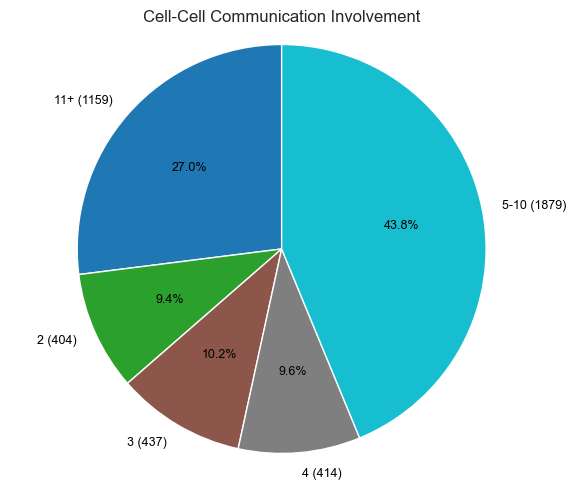

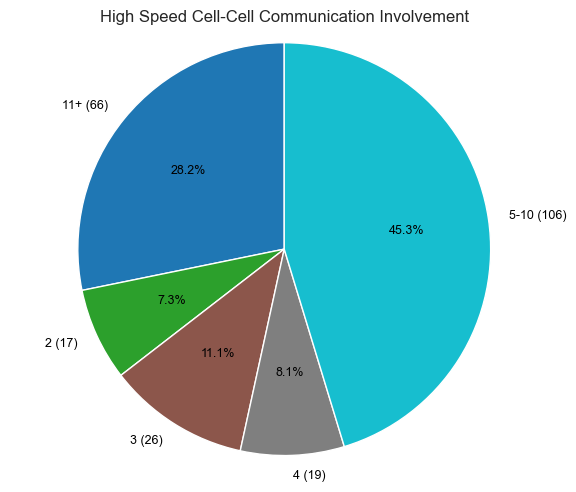

In [24]:
communications["Speed category"] = communications["Speed (um/s)"].apply(lambda x: "High speed" if x > 15 else "Low speed")
plot_pie_chart(
    df=communications,
    column="Number of cells involved category",
    title="Cell-Cell Communication Involvement"
)
plot_pie_chart(
    df=communications[communications["Speed category"] == "High speed"],
    column="Number of cells involved category",
    title="High Speed Cell-Cell Communication Involvement"
)

[2025-08-12 21:10:24] [INFO] calcium: plot_histogram: removed 0 outliers out of 234 on 'Speed (um/s)' (lower=4.24, upper=32.782)


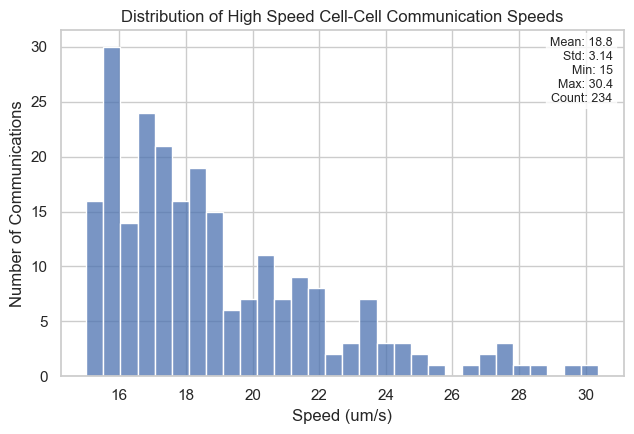

[2025-08-12 21:10:24] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 234 on 'Speed (um/s)' (lower=4.24, upper=32.782)


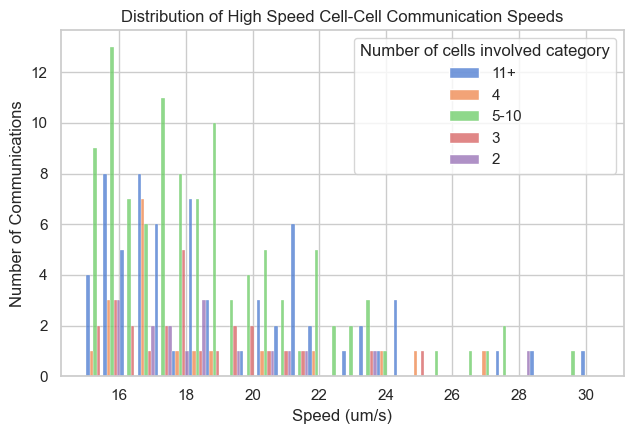

In [25]:
plot_histogram(
    df=communications[communications["Speed category"] == "High speed"],
    column="Speed (um/s)",
    title="Distribution of High Speed Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=30,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False
)
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=30,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    multiple="dodge"
)

[2025-08-12 21:10:24] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 217 on 'Event time phase (fraction of event duration)' (lower=-1.85, upper=2.63)


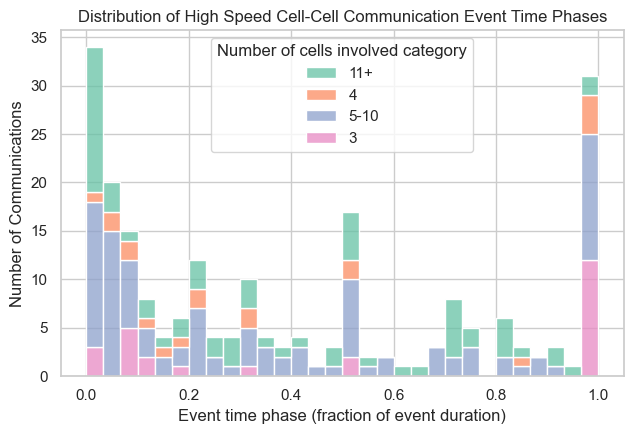

[2025-08-12 21:10:24] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 217 on 'Event recruitment phase (fraction of involved cells)' (lower=-1.5, upper=2)


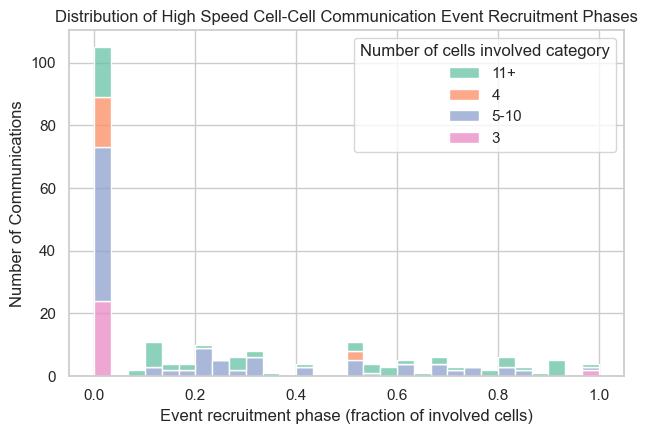

In [26]:
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Event time phase (fraction of event duration)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Event Time Phases",
    ylabel="Number of Communications",
    bin_count=30,
    palette="Set2",
    multiple="stack",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=None,
    y_axis_boundaries=None
)
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Event recruitment phase (fraction of involved cells)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Event Recruitment Phases",
    ylabel="Number of Communications",
    bin_count=30,
    palette="Set2",
    multiple="stack",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=None,
    y_axis_boundaries=None,
)

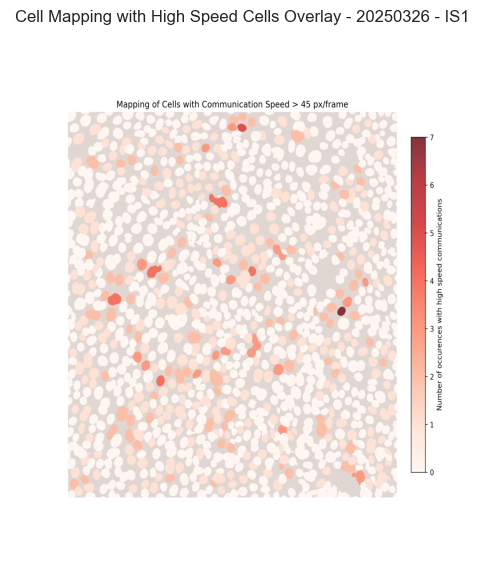

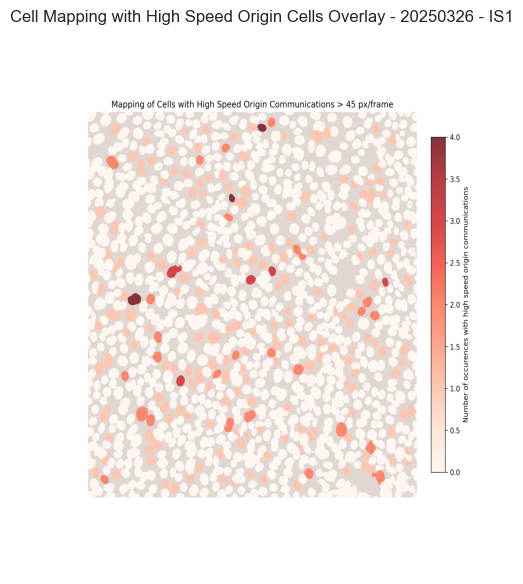

In [27]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/high_speed_cells_overlay.png",
    title="Cell Mapping with High Speed Cells Overlay",
    figsize=(5, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/high_speed_origin_cells_overlay.png",
    title="Cell Mapping with High Speed Origin Cells Overlay",
    figsize=(5, 6)
)

Communication ID  Event ID  Origin cell ID  Origin cell peak ID  \
3        2534379909616         5            1088                    2   
26       2534379085808         6            1208                    2   
35       2534379085712         9             817                    0   
42       2534379086528        10             309                    2   
52       2534379086384        13             408                    5   
...                ...       ...             ...                  ...   
4187     2534227314240      1110            1713                   10   
4190     2534227323360      1111            1713                    1   
4208     2534227324800      1117            1727                    1   
4232     2534227324992      1129            1749                   17   
4246     2534227315680      1139            1757                    3   

      Cause cell ID  Cause cell peak ID  Start time (s)  End time (s)  \
3              1144                   2            80.0          80.0   
26             1245                   3           169.0         169.0   
35              786                   2            85.0          85.0   
42              330                   2           220.0         220.0   
52              360                   3           533.0         534.0   
...             ...                 ...             ...           ...   
4187           1673                  11           938.0         939.0   
4190           1738                   1            91.0          92.0   
4208           1771                   0            48.0          49.0   
4232           1703                  17          1154.0        1155.0   
4246           1717                   2           184.0         185.0   

      Duration (s)  Distance (um)  Speed (um/s)  \
3              0.0          17.47         17.47   
26             0.0          16.82         16.82   
35             0.0          19.63         19.63   
42             0.0          25.38         25.38   
52             1.0          16.51         16.51   
...            ...            ...           ...   
4187           1.0          20.55         20.55   
4190           1.0          17.67         17.67   
4208           1.0          17.95         17.95   
4232           1.0          21.37         21.37   
4246           1.0          15.12         15.12   

      Event time phase (fraction of event duration)  \
3                                              0.15   
26                                             1.00   
35                                             0.71   
42                                             0.41   
52                                             0.50   
...                                             ...   
4187                                           0.33   
4190                                           0.11   
4208                                           0.08   
4232                                            NaN   
4246                                           0.09   

      Event recruitment phase (fraction of involved cells)         dataset  \
3                                                  0.11     20250326 - IS1   
26                                                 0.00     20250326 - IS1   
35                                                 0.00     20250326 - IS1   
42                                                 0.25     20250326 - IS1   
52                                                 0.00     20250326 - IS1   
...                                                 ...                ...   
4187                                               0.00     20250326 - IS1   
4190                                               0.00     20250326 - IS1   
4208                                               0.00     20250326 - IS1   
4232                                                NaN     20250326 - IS1   
4246                                               0.00     20250326 - IS1   

     Number of cells involved category Sp

Speed category  High speed  Low speed
Origin cell ID                       
240                      0          2
241                      0          4
243                      0          3
244                      0          1
245                      0          3
...                    ...        ...
1767                     0          2
1768                     0          2
1771                     0          1
1774                     0          4
1775                     0          7

[993 rows x 2 columns]

Cell ID  Centroid X coordinate (um)  Centroid Y coordinate (um)  \
0         240                      264.55                        5.85   
1         241                      111.15                        6.17   
2         243                      370.18                        6.83   
3         244                       51.02                        7.80   
4         245                      440.05                        8.12   
...       ...                         ...                         ...   
1069     1767                      232.38                      489.78   
1070     1768                      160.22                      489.78   
1071     1771                       15.60                      490.75   
1072     1774                      265.20                      491.07   
1073     1775                      339.30                      492.38   

      Number of peaks  Is active  Occurences in global events  \
0                  15       True                            5   
1                  14       True                            5   
2                  13       True                            5   
3                   9       True                            5   
4                  16       True                            5   
...               ...        ...                          ...   
1069               12       True                            5   
1070               10       True                            5   
1071               10       True                            5   
1072               11       True                            5   
1073               12       True                            5   

      Occurences in global events as early peaker  \
0                                               3   
1                                               0   
2                                               1   
3                                               0   
4                                               1   
...                                           ...   
1069                                            0   
1070                                            0   
1071                                            0   
1072                                            0   
1073                                            1   

      Occurences in sequential events  \
0                                   7   
1                                   4   
2                                   4   
3                                   3   
4                                   5   
...                               ...   
1069                                3   
1070                                4   
1071                                3   
1072                                3   
1073                                5   

      Occurences in sequential events as origin  \
0                                             0   
1                                             1   
2                                             2   
3                                             1   
4                                             1   
...                                         ...   
1069                                          2   
1070                                          2   
1071                                          0   
1072                                          3   
1073                                          3   

      Occurences in individual events  Peak frequency (Hz)  Periodicity score  \
0                                   0               0.0088               0.60   
1                                   5               0.0082               0.58   
2                                   2               0.0076               0.67   
3                                   1               0.0053               0.70   
4                                   4               0.0094               0.56   
...                               ...                  ...                ...   
1069                                3 

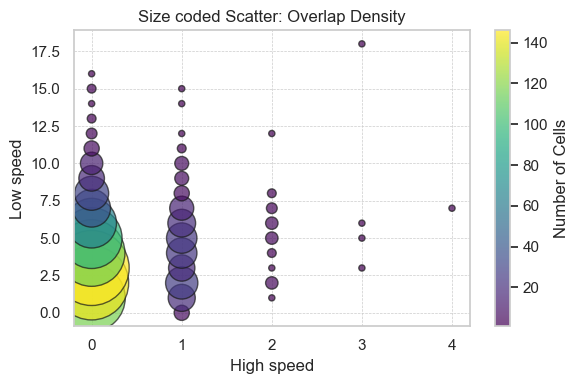

In [28]:
display(communications[communications["Speed category"] == "High speed"])

counts = (
    communications
    .groupby(["Origin cell ID", "Speed category"], dropna=False)
    .size()
    .unstack("Speed category", fill_value=0)
)
display(counts)
out = cells.copy()
out = out.merge(
    counts,
    left_on="Cell ID",
    right_index=True,
    how="left"
).dropna()
display(out)

plot_scatter_size_coded(
    df=out,
    x_col="High speed",
    y_col="Low speed"
)



### Number of cells involved per sequential events

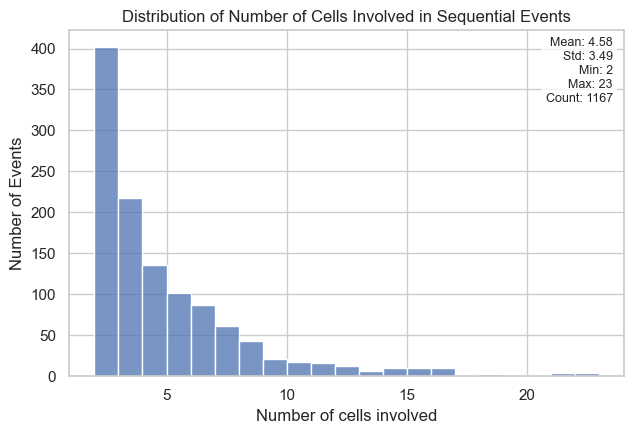

In [29]:
plot_histogram(
    df=sequential_events,
    column="Number of cells involved",
    title="Distribution of Number of Cells Involved in Sequential Events",
    ylabel="Number of Events",
    bin_width=1
)

### Influence of cell count per event on statistics

[2025-08-12 21:10:27] [INFO] calcium: plot_histogram_by_group: removed 111 outliers out of 5460 on 'Duration (s)' (lower=-6, upper=90)


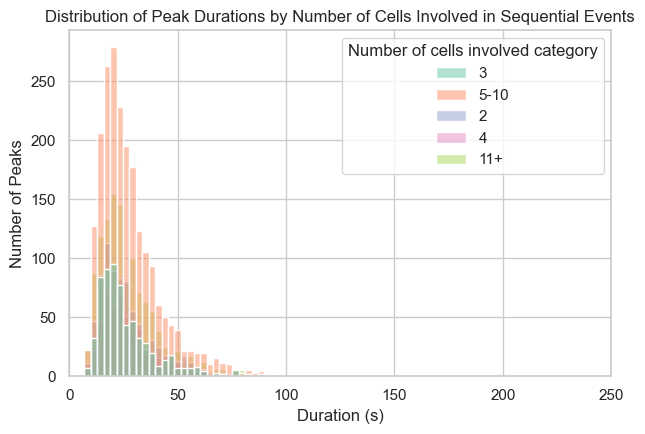

[2025-08-12 21:10:27] [INFO] calcium: plot_histogram_by_group: removed 124 outliers out of 5460 on 'Prominence (noise std units)' (lower=-43, upper=223.4)


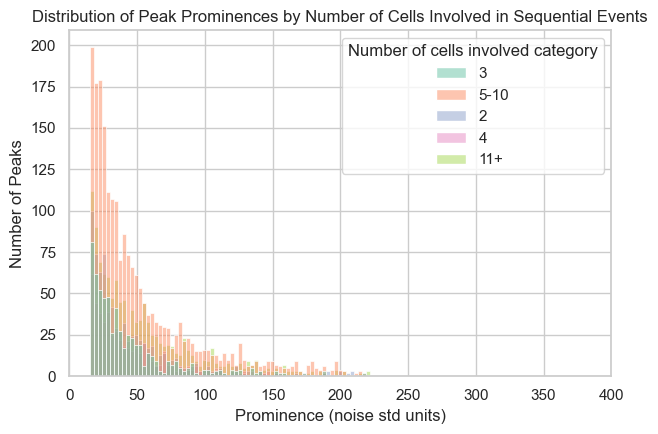

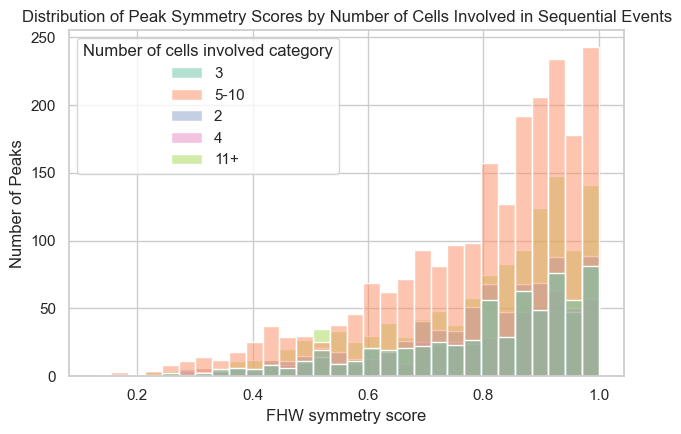

In [30]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Duration (s)",
    group_column="Number of cells involved category",
    title="Distribution of Peak Durations by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Prominence (noise std units)",
    group_column="Number of cells involved category",
    title="Distribution of Peak Prominences by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="FHW symmetry score",
    group_column="Number of cells involved category",
    title="Distribution of Peak Symmetry Scores by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)

[2025-08-12 21:10:27] [INFO] calcium: plot_histogram_by_group: removed 9 outliers out of 1167 on 'Average communication speed (um/s)' (lower=-10.06, upper=18.36)


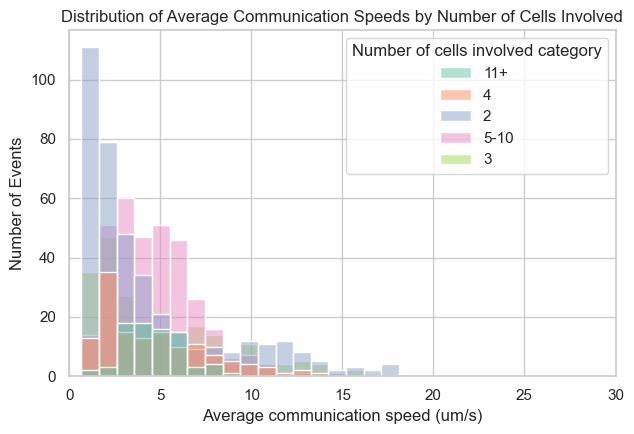

[2025-08-12 21:10:28] [INFO] calcium: plot_histogram_by_group: removed 89 outliers out of 4293 on 'Speed (um/s)' (lower=-11.52, upper=18.72)


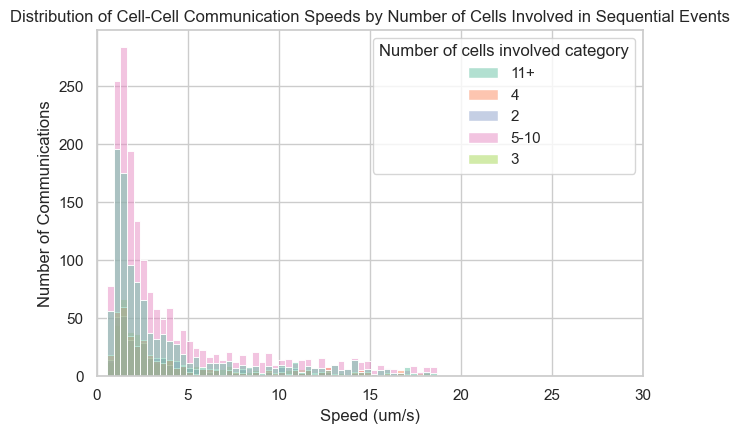

In [31]:
plot_histogram_by_group(
    df=sequential_events,
    value_column="Average communication speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of Average Communication Speeds by Number of Cells Involved",
    ylabel="Number of Events",
    bin_width=1,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

plot_histogram_by_group(
    df=communications,
    value_column="Speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of Cell-Cell Communication Speeds by Number of Cells Involved in Sequential Events",
    ylabel="Number of Communications",
    bin_count=50,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

### Cells occurences as origin in sequential events

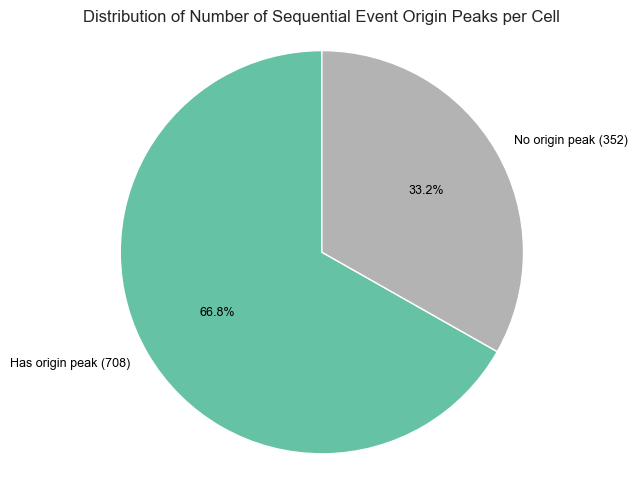

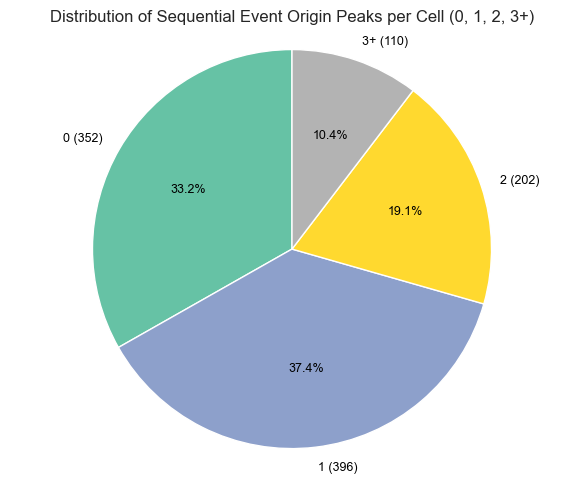

In [32]:
cells["Has origin peak"] = cells["Occurences in sequential events as origin"].apply(lambda x: "Has origin peak" if x > 0 else "No origin peak")
plot_pie_chart(
    df=cells[cells["Occurences in sequential events"] > 0],
    column="Has origin peak",
    title="Distribution of Number of Sequential Event Origin Peaks per Cell",
    palette="Set2"
)
def origin_peak_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    elif n == 2:
        return "2"
    else:
        return "3+"

cells["Origin peak category"] = cells["Occurences in sequential events as origin"].apply(origin_peak_category)

plot_pie_chart(
    df=cells[cells["Occurences in sequential events"] > 0],
    column="Origin peak category",
    title="Distribution of Sequential Event Origin Peaks per Cell (0, 1, 2, 3+)",
    palette="Set2"
)


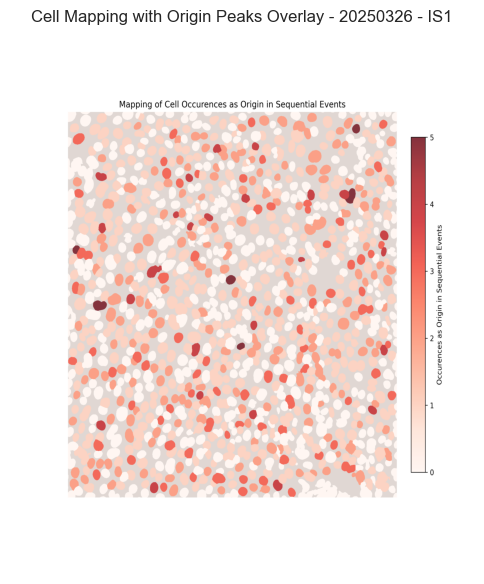

In [33]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurences_in_origin_seq_events_overlay.png",
    title="Cell Mapping with Origin Peaks Overlay",
    figsize=(5, 6)
)

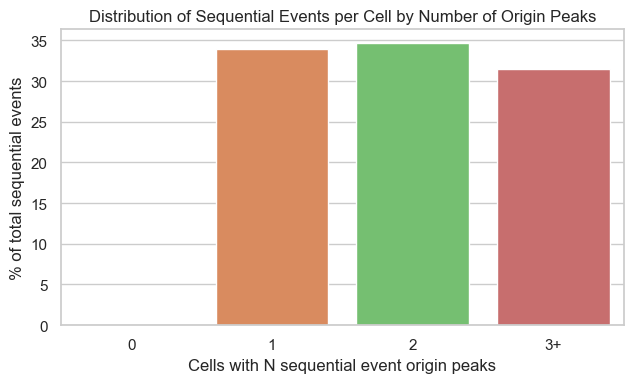

In [34]:
# Sum the total number of sequential origin peaks for each exact value (0, 1, 2, 3, ...)
total_peaks_per_exact_value = (
    cells.groupby("Origin peak category")
    ["Occurences in sequential events as origin"]
    .sum()
    .reset_index(name="Total origin peaks")
)

# Compute normalized percentage
total_sum = total_peaks_per_exact_value["Total origin peaks"].sum()
total_peaks_per_exact_value["% of total"] = (
    total_peaks_per_exact_value["Total origin peaks"] / total_sum * 100
).round(2)

plot_bar(
    df=total_peaks_per_exact_value,
    axis_column="Origin peak category",
    value_column="% of total",
    title="Distribution of Sequential Events per Cell by Number of Origin Peaks",
    ylabel="% of total sequential events",
    xlabel="Cells with N sequential event origin peaks",
    rotation=0
)

### Connection network between cells

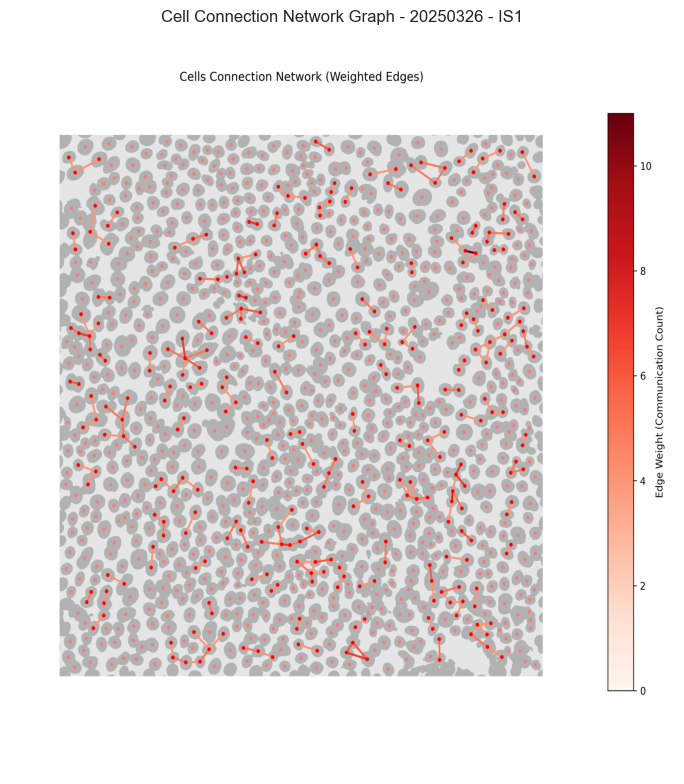

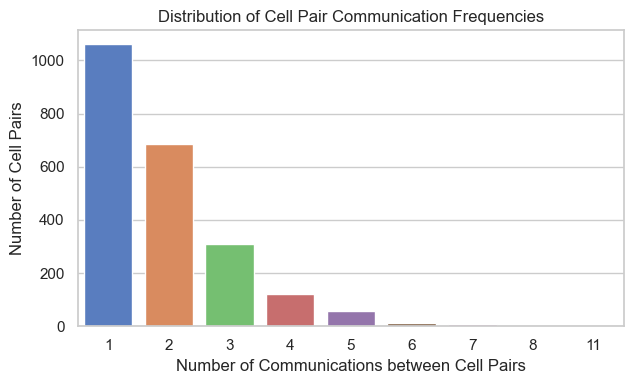

In [35]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_connection_network/cell_connection_network_95.png",
    title="Cell Connection Network Graph",
    figsize=(7, 8)
)

# Create a tuple for each cell pair (order-independent)
cell_pairs = communications.apply(
    lambda row: tuple(sorted([row["Origin cell ID"], row["Cause cell ID"]])), axis=1
)

# Count occurrences of each cell pair
pair_counts = cell_pairs.value_counts()

# Count how many pairs have each occurrence count
occurrence_distribution = pair_counts.value_counts().sort_index()

occurrence_distribution.name = "Number of Cell Pairs"
occurrence_distribution.index.name = "Number of Communications between Cell Pairs"

cells_connection_network = occurrence_distribution.reset_index()

cells_connection_network.columns = ["Number of Communications between Cell Pairs", "Number of Cell Pairs"]

plot_bar(
    df=cells_connection_network,
    axis_column="Number of Communications between Cell Pairs",
    value_column="Number of Cell Pairs",
    title="Distribution of Cell Pair Communication Frequencies",
    xlabel="Number of Communications between Cell Pairs",
    ylabel="Number of Cell Pairs",
    rotation=0
)

## INDIVIDUAL EVENTS

### Cells occurences in individual events

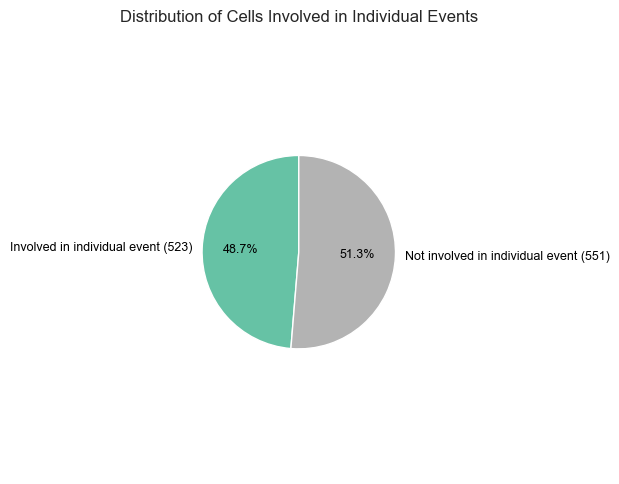

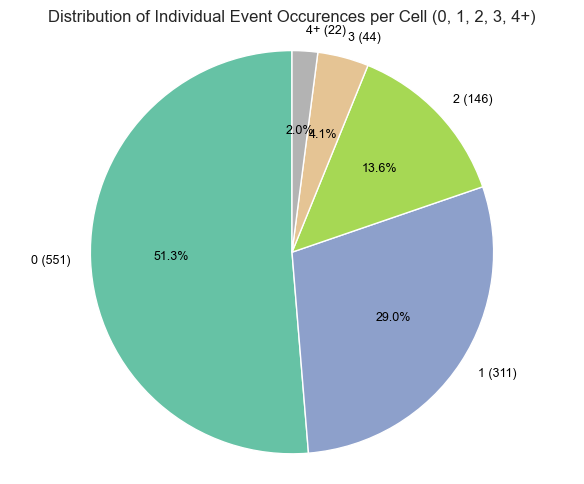

In [36]:
cells["Involved in individual event"] = cells["Occurences in individual events"].apply(lambda x: "Involved in individual event" if x > 0 else "Not involved in individual event")

plot_pie_chart(
    df=cells,
    column="Involved in individual event",
    title="Distribution of Cells Involved in Individual Events",
    palette="Set2"
)

def cells_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    elif n == 2:
        return "2"
    elif n == 3:
        return "3"
    else:
        return "4+"

cells["Occurences in individual events category"] = cells["Occurences in individual events"].apply(cells_category)

plot_pie_chart(
    df=cells,
    column="Occurences in individual events category",
    title="Distribution of Individual Event Occurences per Cell (0, 1, 2, 3, 4+)",
    palette="Set2"
)

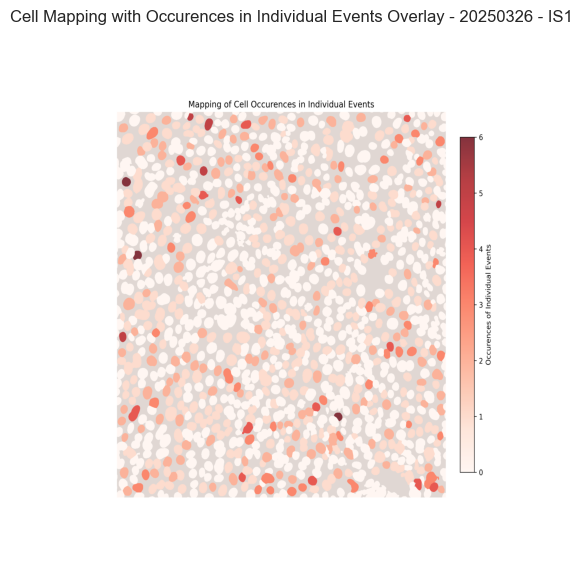

In [37]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurences_in_individual_events_overlay.png",
    title="Cell Mapping with Occurences in Individual Events Overlay",
    figsize=(5, 6)
)

### Peaks statistics in individual events

[2025-08-12 21:10:31] [INFO] calcium: plot_histogram: removed 22 outliers out of 834 on 'Duration (s)' (lower=-36, upper=83)


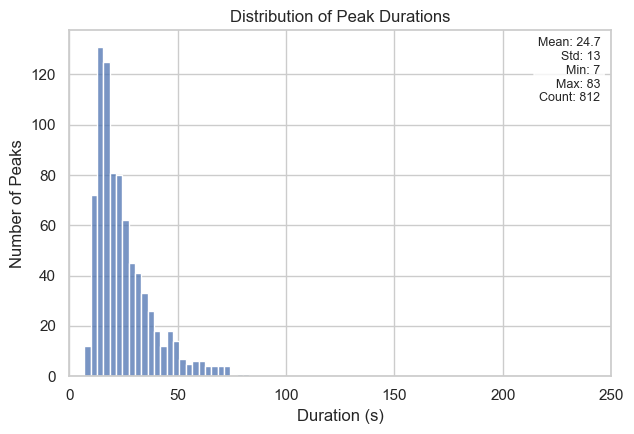

[2025-08-12 21:10:31] [INFO] calcium: plot_histogram: removed 35 outliers out of 834 on 'Prominence (noise std units)' (lower=-58.5, upper=124.2)


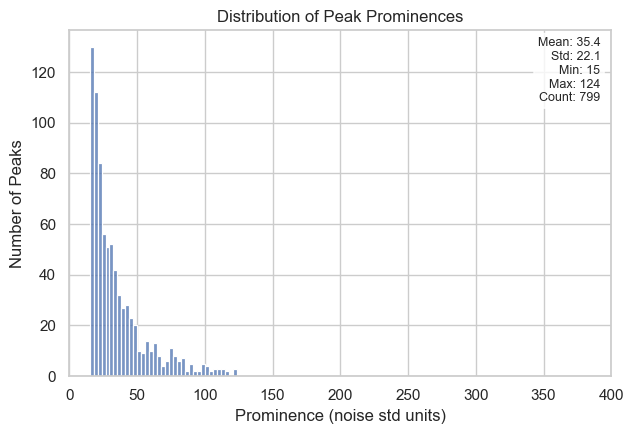

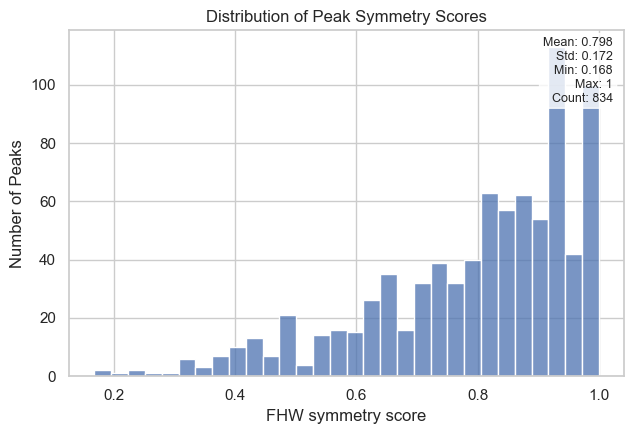

In [38]:
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Correlation between event activity level & individual activity level

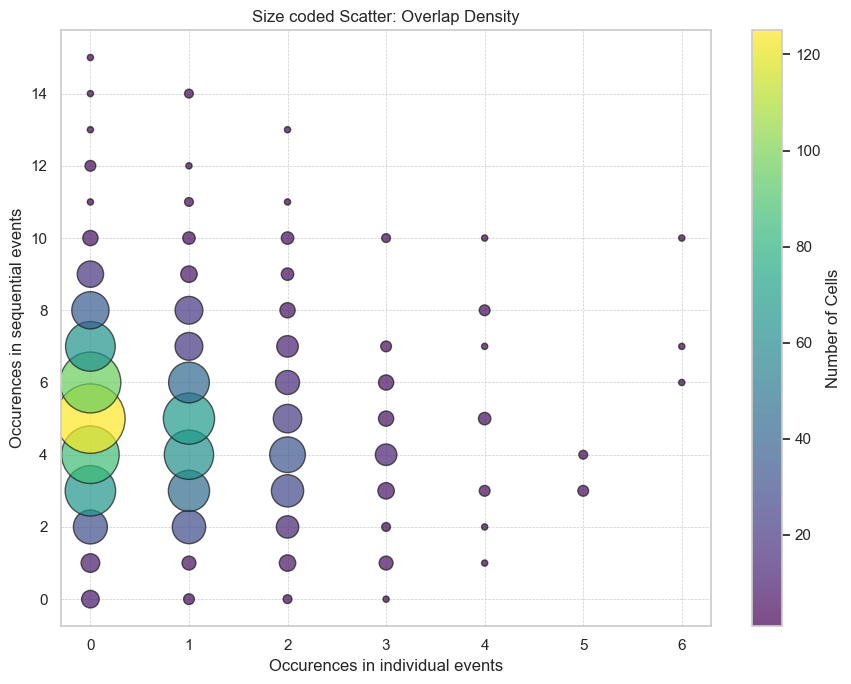

In [39]:
plot_scatter_size_coded(
    df=cells,
    x_col="Occurences in individual events",
    y_col="Occurences in sequential events",
    size_scale=20,
    figsize=(9, 7)
)

## CELLS MOTION

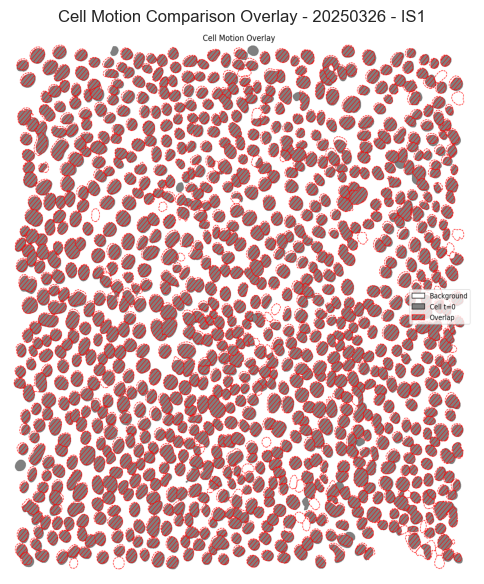

Number of cells:
- Hoechst image taken at t=0: 1057
- Hoechst image taken at t=1801: 1054
- Number of cells difference: absolute 3, relative 0.28%
Pixel-level cell segmentation:
- Total number of pixels in image: 4194304
- Pixels segmented as cell at t=0: 1118572
- Pixels segmented as cell at t=1801: 1144633
- Overlapping pixels between t=0 and t=1801: 985731(87.11% of total)
- Pixels exclusive to t=0: 132841 (11.88% of total)
- Pixels exclusive to t=1801: 158902 (13.88% of total)


In [40]:
visualize_image(
    image_source=control_paths,
    image_name="cell-motion/cellmotion_comparison_overlay.png",
    title="Cell Motion Comparison Overlay",
    figsize=(5, 6)
)

cm = cellmotion.set_index("Metric")["Value"]
print("Number of cells:")
print(f"- Hoechst image taken at t=0: {int(cm['n_cells_t0'])}")
print(f"- Hoechst image taken at t=1801: {int(cm['n_cells_t1'])}")
print(
    f"- Number of cells difference: absolute {int(cm['cell_count_diff_abs'])}, "
    f"relative {cm['cell_count_diff_rel'] * 100:.2f}%"
)
print("Pixel-level cell segmentation:")
print(f"- Total number of pixels in image: {int(cm['total_pixels'])}")
print(f"- Pixels segmented as cell at t=0: {int(cm['pixels_t0'])}")
print(f"- Pixels segmented as cell at t=1801: {int(cm['pixels_t1'])}")
print(f"- Overlapping pixels between t=0 and t=1801: {int(cm['pixels_both'])}"
      f"({cm['pixels_both_rel'] * 100:.2f}% of total)")
print(f"- Pixels exclusive to t=0: {int(cm['pixels_only_t0'])} "
      f"({cm['pixels_only_t0_rel'] * 100:.2f}% of total)")
print(f"- Pixels exclusive to t=1801: {int(cm['pixels_only_t1'])} "
      f"({cm['pixels_only_t1_rel'] * 100:.2f}% of total)")
